# Analyzing CIA Factbook Data

Here, we work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:

* population - The population as of 2015.
* population_growth - The annual population growth rate, as a percentage.
* area - The total land and water area.

## Introduction

* We first connect to factbook.db and used pandas SQL query to return information on the tables in the database. 
* We then used another query to display the first 5 rows of facts table

In [18]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('factbook.db')

q1 = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [19]:
q2 = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


The descriptions for some of the columns are given as follows:
    
* name - The name of the country.
* area - The total land and sea area of the country.
* population - The country's population.
* population_growth - The country's population growth as a percentage.
* birth_rate - The country's birth rate, or the number of births a year per 1,000 people.
* death_rate - The country's death rate, or the number of death a year per 1,000 people.
* area- The country's total area (both land and water).
* area_land - The country's land area in square kilometers.
* area_water - The country's waterarea in square kilometers.

## Summary Statistics

In [20]:
q3 = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts"
pd.read_sql_query(q3, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


2 observations stand out from the summary statistics:
    
* there's a country with a population of 0
* there's a country with a population of 7256490011 (or more than 7.2 billion people)

## Outliers

In [21]:
q4 = "SELECT name FROM facts WHERE population = 0"
pd.read_sql_query(q4, conn)

,name
0,Antarctica


In [23]:
q5 = "SELECT name FROM facts WHERE population = 7256490011"
pd.read_sql_query(q5, conn)

,name
0,World


It seems like the table contains a row for the whole world, which explains the population of over 7.2 billion. It also seems like the table contains a row for Antarctica, which explains the population of 0. This seems to match the CIA Factbook page for Antarctica:
https://www.cia.gov/library/publications/the-world-factbook/geos/ay.html

## Histograms

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13d71609b0>,
      dtype=object)

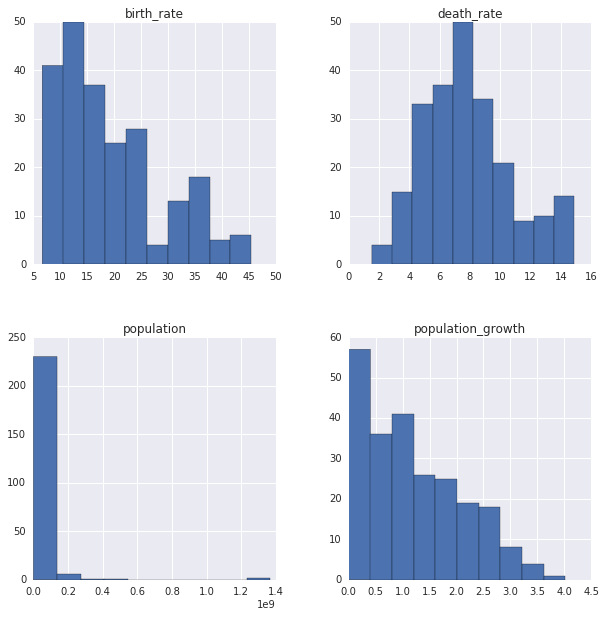

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q6 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(q6, conn).hist(ax=ax)

## Analysis

### Which countries have the highest population density?
Population density is the ratio of population to land area.

In [28]:
q7 = '''
SELECT name, population/area as population_density FROM facts ORDER BY population_density DESC LIMIT 20
'''
pd.read_sql_query(q7, conn)


,name,population_density
0,Macau,21168
1,Monaco,15267
2,Singapore,8141
3,Hong Kong,6445
4,Gaza Strip,5191
5,Gibraltar,4876
6,Bahrain,1771
7,Maldives,1319
8,Malta,1310
9,Bermuda,1299


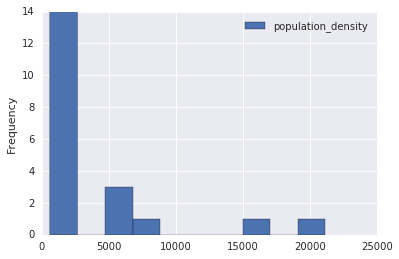

In [29]:
pd.read_sql_query(q7, conn).plot.hist()

## Which countries have the highest ratios of water to land? 

In [30]:
q8 = '''
SELECT name, area_land/area_water as watertoland_ratio FROM facts ORDER BY watertoland_ratio DESC LIMIT 20
'''
pd.read_sql_query(q8, conn)

,name,watertoland_ratio
0,Bosnia and Herzegovina,5118
1,Niger,4222
2,Morocco,1785
3,Guinea,1755
4,Costa Rica,1276
5,Djibouti,1159
6,"Korea, North",926
7,Cyprus,924
8,Namibia,821
9,Burkina Faso,684


The histogram plot shows the distribution of water to land ratio of countries across the world

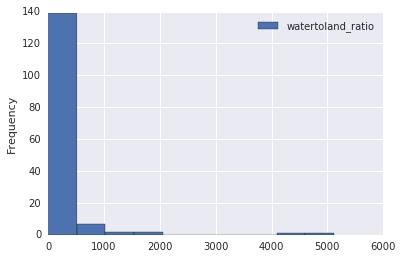

In [33]:
q8a = '''
SELECT name, area_land/area_water as watertoland_ratio 
FROM facts 
ORDER BY watertoland_ratio 
'''
pd.read_sql_query(q8a, conn).plot.hist()

## Which countries have more water than land?

In [32]:
q9 = '''
SELECT name, area_land/area_water as watertoland_ratio 
FROM facts 
WHERE watertoland_ratio > 1
ORDER BY watertoland_ratio
LIMIT 20
'''
pd.read_sql_query(q9, conn)

,name,watertoland_ratio
0,"Bahamas, The",2
1,Guinea-Bissau,3
2,Malawi,3
3,Netherlands,4
4,Uganda,4
5,Eritrea,6
6,Liberia,6
7,Bangladesh,7
8,Finland,8
9,"Gambia, The",8
